In [1]:
import numpy as np
from scipy import ndimage
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import *
import stpy
#### Import SACLA python library
# os.system("module load python/SACLA_python-3.7")
# os.system("python3")
import dbpy
import stpy

from citius import *
%load_ext autoreload
%autoreload 2
%matplotlib widget

from IPython.display import HTML
HTML("""
<script>
window.IPython = {
  notebook: {
    kernel: { execute: function(cmd) { console.log("kernel exec blocked:", cmd); } }
  }
};
</script>
""")

Invalid character . in PBS_JOBID


In [2]:
# collect runs to build avDark_im
read_path = "citiusData"

x1, y1, x2, y2 = 160, 340, 230, 400  # ROI coordinates 

readCITIUS = CITIUSReader(read_path, bl=3, ROI=[x1, y1, x2, y2])

In [3]:
avDark_im = np.load("avDark_im_255550_255586.npy")
print(np.shape(avDark_im))
avDark_im_roi = avDark_im[y1:y2, x1:x2]
print(np.shape(avDark_im_roi))

(728, 384)
(60, 70)


Don't use this to count photons! the imgs read from readCITIUS .npys are divided by float(numberOfTrains)                 , so this is an inaccurate way of measuring photons, instead look at citiusDroplet.ipynb for droplet algorithm
Applying threshold


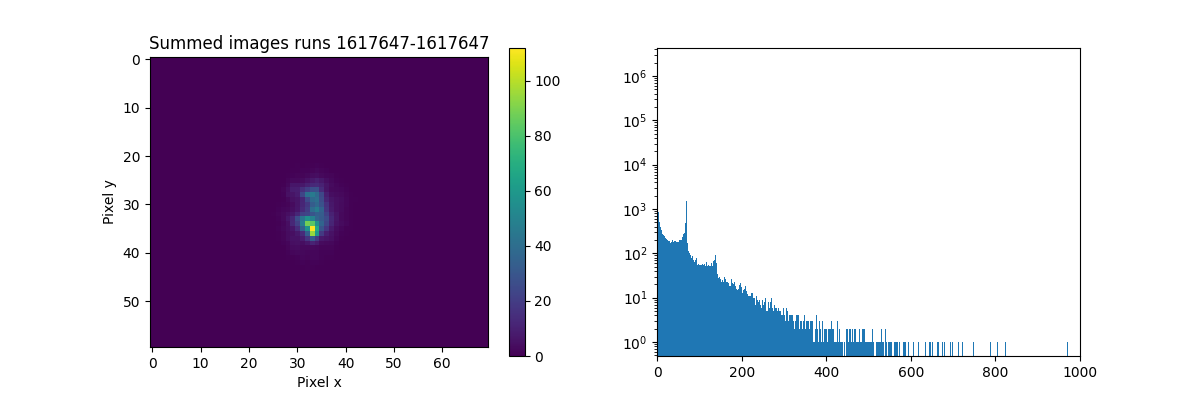

Threshold applied = [0.0, None]



In [50]:
# Double diffraction run check we see something...
run_list = np.arange(1617647, 1617647+1)

img_list, imgROI_list, bins_list, counts_list, binsROI_list, countsROI_list = readCITIUS.read_runlist(run_list)

lower_threshold, upper_threshold = 0.0 , None
sum_imgROI, int_sum_imgROI = readCITIUS.photon_counter(run_list, threshold=[lower_threshold, upper_threshold], imDark = avDark_im_roi)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title(f"Summed images runs {run_list[0]}-{run_list[-1]}")
ax[0].set_xlabel("Pixel x")
ax[0].set_ylabel("Pixel y")

im = ax[0].imshow(sum_imgROI)
fig.colorbar(im, ax=ax[0])

ax[1].bar(binsROI_list[0],countsROI_list[0])
ax[1].set_xlim(0,1000)
ax[1].set_yscale('log')

plt.show()
if readCITIUS.threshold is not None:
    print(f"Threshold applied = {readCITIUS.threshold}")
print()

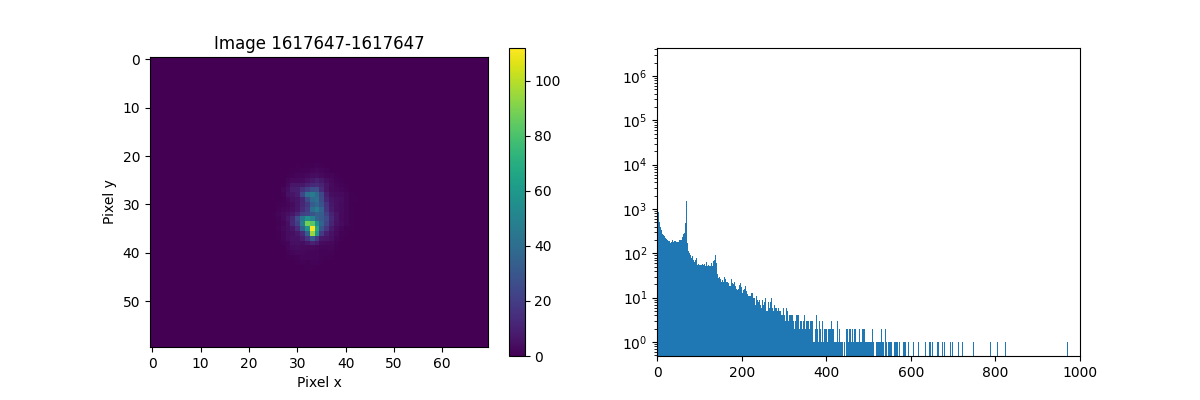

In [51]:
run_list = np.arange(1617647, 1617647+1)

img_list, imgROI_list, bins_list, counts_list, binsROI_list, countsROI_list = readCITIUS.read_runlist(run_list)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title(f"Image {run_list[0]}-{run_list[-1]}")
ax[0].set_xlabel("Pixel x")
ax[0].set_ylabel("Pixel y")

im = ax[0].imshow(sum_imgROI)
fig.colorbar(im, ax=ax[0])

ax[1].bar(binsROI_list[0],countsROI_list[0])
ax[1].set_xlim(0,1000)
ax[1].set_yscale('log')

plt.show()

In [4]:
# collect runs to build avDark_im
detectorID_CITIUS = 'CITIUS1'

base_path = "."

procCITIUS = CITIUSProcessing(base_path, detectorID_CITIUS, bl=3)

In [33]:
# testing droplet algorithm
run_list = np.arange(1617647, 1617647+1)

lower_threshold, upper_threshold = 1.0 , None
threshold = [lower_threshold, upper_threshold]

# results = {
#             'droplets': {},
#             'photon_maps': {},
#             'histograms': {}
#         }

results_list, citiusData_list, count, bins = procCITIUS.call_droplet_algorithm_ONETRAIN(run_list, imDark = avDark_im, threshold=threshold, ROI=True, out_path='dropletData')

Processing time / trains = 0.0591733455657959


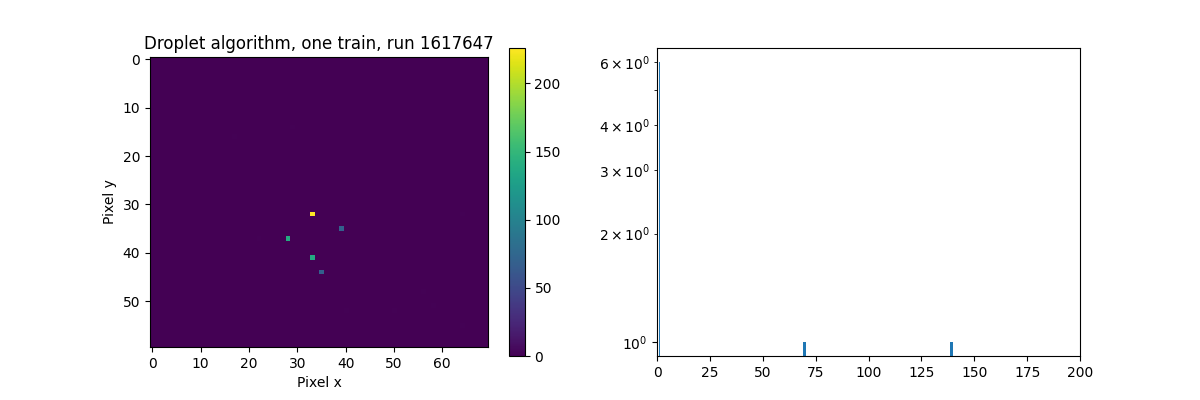

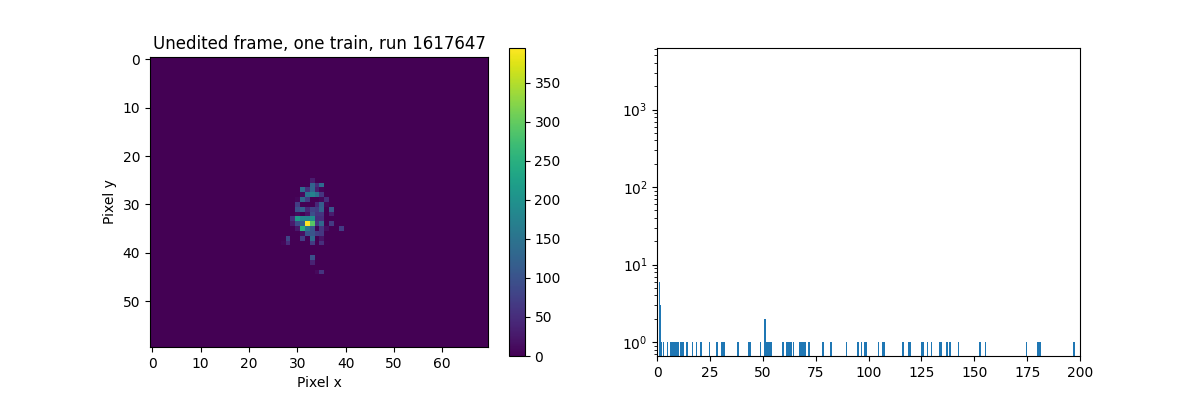

In [34]:
# Check one train
results = results_list[0]
citiusData = citiusData_list[0]

photon_map = results['photon_maps']
hist = results['histograms']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title(f"Droplet algorithm, one train, run {run_list[0]}")
ax[0].set_xlabel("Pixel x")
ax[0].set_ylabel("Pixel y")
im1 = ax[0].imshow(photon_map)
fig.colorbar(im1, ax=ax[0])

ax[1].bar(hist[0], hist[1])
ax[1].set_xlim(0,200)
ax[1].set_yscale('log')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title(f"Unedited frame, one train, run {run_list[0]}")
ax[0].set_xlabel("Pixel x")
ax[0].set_ylabel("Pixel y")
im = ax[0].imshow(citiusData)
fig.colorbar(im, ax=ax[0])

# Saving histograms
binCenters = []
for i in range(np.shape(bins)[0]-1):
    binCenters.append((bins[i]+bins[i+1]) * 0.5)
    
ax[1].bar(binCenters, count)
ax[1].set_xlim(0,200)
ax[1].set_yscale('log')

plt.show()

In [8]:
# testing droplet algorithm
run_list = np.arange(1617646, 1617646+1)

lower_threshold, upper_threshold = 5.0 , None
threshold = [lower_threshold, upper_threshold]

# results = {
#             'droplets': {},
#             'photon_maps': {},
#             'histograms': {}
#         }

results_list, citiusData_list, totalCounts, bins = procCITIUS.call_droplet_algorithm_ONETRAIN(run_list, imDark = avDark_im, threshold=threshold, ROI=True, out_path='dropletData')

[debug] no droplets detected; returning empty results dict
Processing time / trains = 0.07629656791687012


/home/blstaff/SACLA_python/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


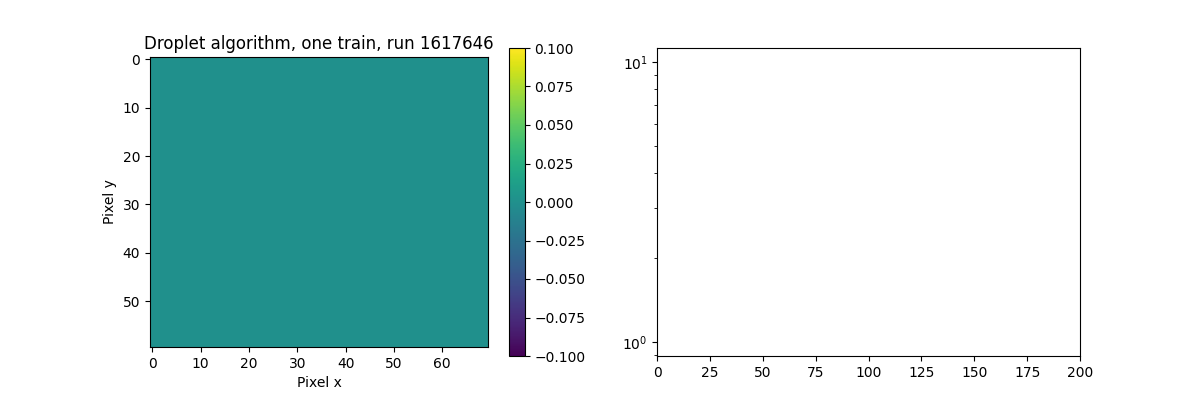

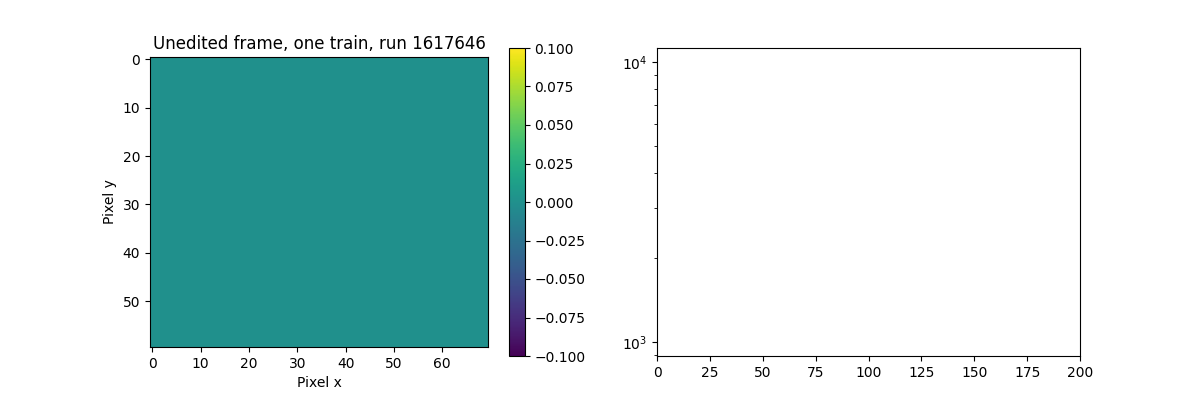

In [10]:
# Check one train
results = results_list[0]
citiusData = citiusData_list[0]

photon_map = results['photon_maps']
hist = results['histograms']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title(f"Droplet algorithm, one train, run {run_list[0]}")
ax[0].set_xlabel("Pixel x")
ax[0].set_ylabel("Pixel y")
im1 = ax[0].imshow(photon_map)
fig.colorbar(im1, ax=ax[0])

ax[1].bar(hist[0], hist[1])
ax[1].set_xlim(0,200)
ax[1].set_yscale('log')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title(f"Unedited frame, one train, run {run_list[0]}")
ax[0].set_xlabel("Pixel x")
ax[0].set_ylabel("Pixel y")
im = ax[0].imshow(citiusData)
fig.colorbar(im, ax=ax[0])

# Saving histograms
binCenters = []
for i in range(np.shape(bins)[0]-1):
    binCenters.append((bins[i]+bins[i+1]) * 0.5)
    
ax[1].bar(binCenters, totalCounts)
ax[1].set_xlim(0,200)
ax[1].set_yscale('log')

plt.show()

Processing time / train = 0.0027423978328704832


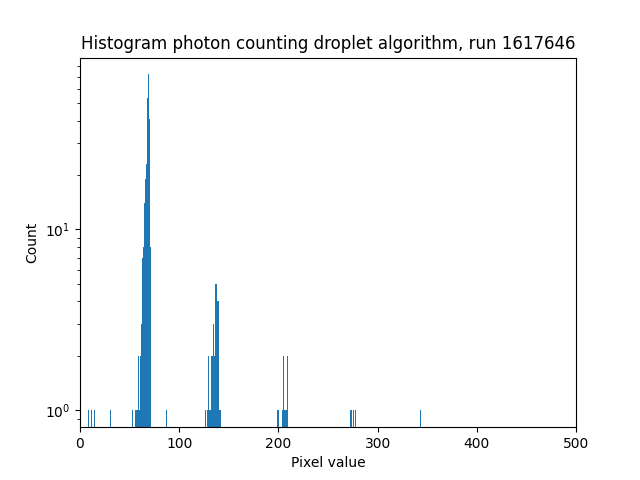

In [31]:
# testing droplet algorithm
run_list = np.arange(1617646, 1617646+1)

lower_threshold, upper_threshold = 5.0 , None
threshold = [lower_threshold, upper_threshold]

# results = {
#             'droplets': {},
#             'photon_maps': {},
#             'histograms': {}
#         }

results_list, citiusData_list, totalCounts, bins = procCITIUS.call_droplet_algorithm(run_list, imDark = avDark_im, threshold=threshold, \
                                                                                     ROI=True, out_path='dropletData')

binCenters, dropletCounts = [], []
for results in results_list:
    binCenters.append(results['histograms'][0])
    dropletCounts.append(results['histograms'][1])
    
counts_all = np.sum(np.array(dropletCounts), axis=0)

plt.figure()

plt.title(f'Histogram photon counting droplet algorithm, run {run_list[0]}')
plt.bar(binCenters[0], counts_all)

plt.xlim(0,500)
plt.yscale('log')

plt.xlabel('Pixel value')
plt.ylabel('Count')

plt.show()

Processing time / train = 0.0030189970016479494


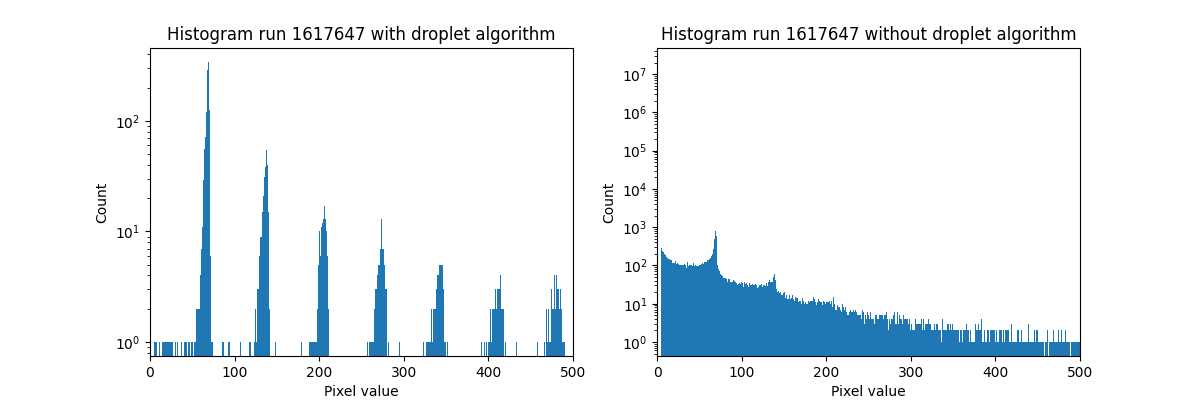

In [44]:
# testing droplet algorithm
run_list = np.arange(1617647, 1617647+1)

lower_threshold, upper_threshold = 5.0 , None
threshold = [lower_threshold, upper_threshold]

# results = {
#             'droplets': {},
#             'photon_maps': {},
#             'histograms': {}
#         }

results_list, citiusData_list, totalCounts, bins = procCITIUS.call_droplet_algorithm(run_list, imDark = avDark_im, \
                                                                                     threshold=threshold, ROI=True, out_path='dropletData')

binCenters, dropletCounts = [], []
for results in results_list:
    binCenters.append(results['histograms'][0])
    dropletCounts.append(results['histograms'][1])
    
counts_all = np.sum(np.array(dropletCounts), axis=0)

# plt.figure()

# plt.title(f'Histogram photon counting droplet algorithm, run {run_list[0]}')
# plt.bar(binCenters[0], counts_all)

# plt.xlim(0,500)
# plt.yscale('log')

# plt.xlabel('Pixel value')
# plt.ylabel('Count')

# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(binCenters[0], counts_all)

ax[0].set_xlim(0,500)
ax[0].set_yscale('log')
ax[0].set_title(f"Histogram run {run_list[0]} with droplet algorithm")
ax[0].set_xlabel('Pixel value')
ax[0].set_ylabel('Count')

# Saving histograms
binCenters = []
for i in range(np.shape(bins)[0]-1):
    binCenters.append((bins[i]+bins[i+1]) * 0.5)
    
ax[1].bar(binCenters, totalCounts)
ax[1].set_xlim(0,500)
ax[1].set_yscale('log')
ax[1].set_title(f"Histogram run {run_list[0]} without droplet algorithm")
ax[1].set_xlabel('Pixel value')
ax[1].set_ylabel('Count')

plt.show()


Processing time / train = 0.0027094839572906495


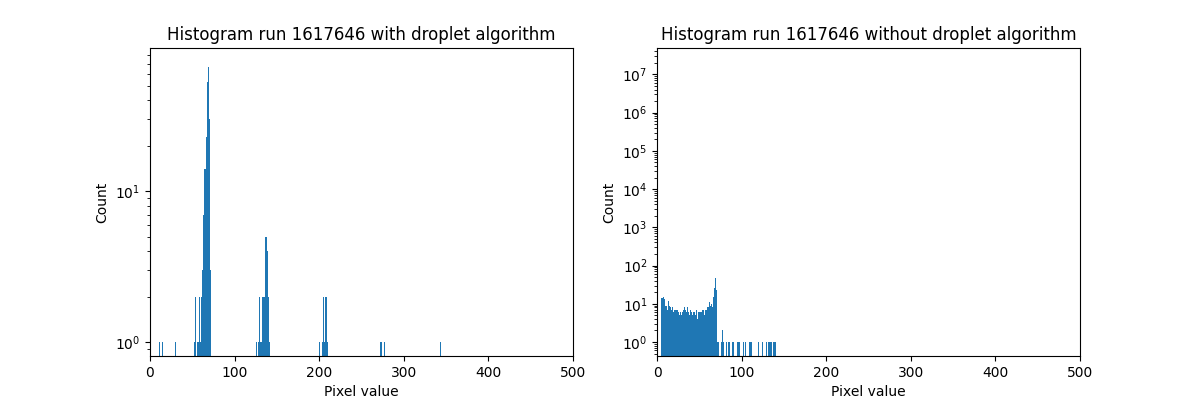

In [45]:
# testing droplet algorithm
run_list = np.arange(1617646, 1617646+1)

lower_threshold, upper_threshold = 5.0 , None
threshold = [lower_threshold, upper_threshold]

# results = {
#             'droplets': {},
#             'photon_maps': {},
#             'histograms': {}
#         }

results_list, citiusData_list, totalCounts, bins = procCITIUS.call_droplet_algorithm(run_list, imDark = avDark_im, \
                                                                                     threshold=threshold, ROI=True, out_path='dropletData')

binCenters, dropletCounts = [], []
for results in results_list:
    binCenters.append(results['histograms'][0])
    dropletCounts.append(results['histograms'][1])
    
counts_all = np.sum(np.array(dropletCounts), axis=0)

# plt.figure()

# plt.title(f'Histogram photon counting droplet algorithm, run {run_list[0]}')
# plt.bar(binCenters[0], counts_all)

# plt.xlim(0,500)
# plt.yscale('log')

# plt.xlabel('Pixel value')
# plt.ylabel('Count')

# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(binCenters[0], counts_all)

ax[0].set_xlim(0,500)
ax[0].set_yscale('log')
ax[0].set_title(f"Histogram run {run_list[0]} with droplet algorithm")
ax[0].set_xlabel('Pixel value')
ax[0].set_ylabel('Count')

# Saving histograms
binCenters = []
for i in range(np.shape(bins)[0]-1):
    binCenters.append((bins[i]+bins[i+1]) * 0.5)
    
ax[1].bar(binCenters, totalCounts)
ax[1].set_xlim(0,500)
ax[1].set_yscale('log')
ax[1].set_title(f"Histogram run {run_list[0]} without droplet algorithm")
ax[1].set_xlabel('Pixel value')
ax[1].set_ylabel('Count')

plt.show()


In [48]:
run_list = np.arange(1617372, 1617372+1)

lower_threshold, upper_threshold = 1.0 , None
threshold = [lower_threshold, upper_threshold]

# results = {
#             'droplets': {},
#             'photon_maps': {},
#             'histograms': {}
#         }

results_list, citiusData_list, totalCounts, bins = procCITIUS.call_droplet_algorithm(run_list, imDark = avDark_im, \
                                                                                     threshold=threshold, ROI=True, out_path='dropletData')

binCenters, dropletCounts = [], []
for results in results_list:
    binCenters.append(results['histograms'][0])
    dropletCounts.append(results['histograms'][1])
    
counts_all = np.sum(np.array(dropletCounts), axis=0)

Processing time / train = 0.0037640302181243895


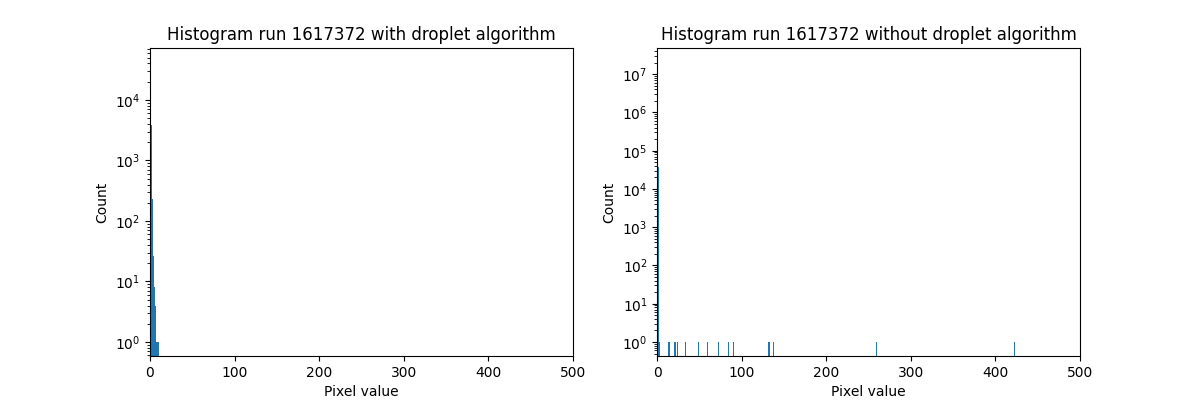

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(binCenters[0], counts_all)

ax[0].set_xlim(0,500)
ax[0].set_yscale('log')
ax[0].set_title(f"Histogram run {run_list[0]} with droplet algorithm")
ax[0].set_xlabel('Pixel value')
ax[0].set_ylabel('Count')

# Saving histograms
binCenters = []
for i in range(np.shape(bins)[0]-1):
    binCenters.append((bins[i]+bins[i+1]) * 0.5)
    
ax[1].bar(binCenters, totalCounts)
ax[1].set_xlim(0,500)
ax[1].set_yscale('log')
ax[1].set_title(f"Histogram run {run_list[0]} without droplet algorithm")
ax[1].set_xlabel('Pixel value')
ax[1].set_ylabel('Count')

plt.show()